In [1]:
pip install control

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import control
from control.matlab import ctrb, place, obsv

import numpy as np
from numpy.linalg import eig, matrix_rank
from scipy import integrate
import matplotlib.pyplot as plt

In [3]:
# Example 0
A = [[0, 1], 
     [0, 0]]

B = [[0], 
     [1]]

C = [[1,0]]

print(A)

[[0, 1], [0, 0]]


In [4]:
# Compute eigenvalues, eigenvectors
w,v = eig(A)
print('eigenvalues:', w)

eigenvalues: [0. 0.]


In [5]:
# Controllability matrix
W_c = ctrb(A, B)
matrix_rank(W_c)

np.int64(2)

In [6]:
# Eigenvalue assignment
F = place(A,B,[-1,-2])
F = -F
print(F)

[[-2. -3.]]


In [7]:
# Observability matrix
W_o=obsv(A, B)
matrix_rank(W_o)

ControlDimension: state-space matrix C has the wrong number of columns; expected 2 instead of 1

In [8]:
# Eigenvalue assignment
P = place(np.transpose(A),np.transpose(C),[-1,-2])
L = -np.transpose(P)
print(L)

print(eig(A+L*C))

[[-3.]
 [-2.]]
EigResult(eigenvalues=array([-2., -1.]), eigenvectors=array([[-0.70710678, -0.4472136 ],
       [-0.70710678, -0.89442719]]))


In [9]:
# Closed-loop system matrix
X1 = np.concatenate((A, B*F), axis=1)
X2 = np.concatenate((-L*C, A+B*F+L*C), axis=1)
A_cl = np.concatenate((X1,X2), axis=0)

print(A_cl)

w_cl,v_cl = eig(A_cl)
print('eigenvalues:', w_cl)

[[ 0.  1. -0. -0.]
 [ 0.  0. -2. -3.]
 [ 3.  0. -3.  1.]
 [ 2.  0. -4. -3.]]
eigenvalues: [-2.00000004 -1.99999996 -1.00000009 -0.99999991]


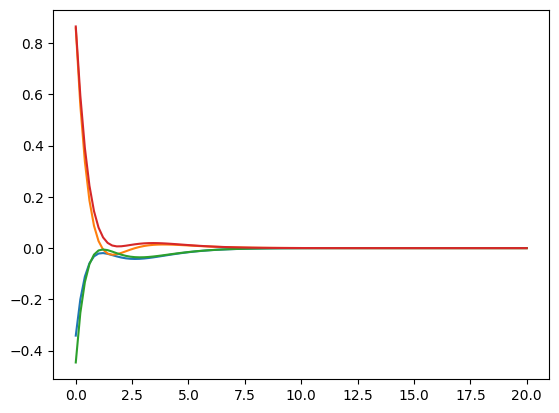

In [10]:
# Plot
def f(t, x):
    return np.dot(A_cl,x)

t0, t1 = 0, 20                # start and end
t = np.linspace(t0, t1, 100)  # the points of evaluation of solution             
x0 = [np.random.uniform(-1, 1), np.random.uniform(-1, 1), np.random.uniform(-1, 1), np.random.uniform(-1, 1)] # initial value
#print(x0)
x = np.zeros((len(t), len(x0)))   # array for solution
x[0,:] = x0
r = integrate.ode(f).set_integrator("dopri5")  # choice of method
r.set_initial_value(x0, t0)   # initial values

for i in range(1, t.size):
   x[i, :] = r.integrate(t[i]) # get one more value, add it to the array
   if not r.successful():
       raise RuntimeError("Could not integrate")
plt.plot(t, x)
plt.show()